In [8]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm 
#캔버스(figure)를 생성, 기본그래픽 함수 제공
from matplotlib import pyplot as plt
#고급그래픽 기능 제공
import seaborn as sb

In [9]:
df= load_data('covid19_active')
df

[data] https://data.hossam.kr/data/lab06/covid19_active.xlsx
[desc] 2022년 5월 1일부터 2023년 5월 31일까지 서울과 전국의 Covid19 일일 확진자 수를 기록한 데이터 (출처: 서울시)
[!] Cannot read metadata


,서울시 일일 확진,전국 일일 확진
기준일,,
2023-05-31,5987.0,24411.0
2023-05-30,3326.0,13529.0
2023-05-29,1393.0,6868.0
2023-05-28,1393.0,6868.0
2023-05-27,4078.0,17796.0
...,...,...
2022-05-05,6645.0,42296.0
2022-05-04,7436.0,49064.0
2022-05-03,8709.0,51131.0


In [10]:
my_dpi = 120                                # 이미지 선명도를 결정하는 1인치당 점(픽셀의 수)
my_font_name= "Noto Sans KR"                # 시스템에 등록된 글꼴이름
my_theme ="dark"                            # 그림스타일 지정
                                    
sb.set_theme(style=my_theme)                #seaborn 스타일(화풍 설정하기)

plt.rcParams['font.family'] = my_font_name  #그래프에 한글폰트 적용
plt.rcParams['font.size']=16                #기본 폰트 크기
plt.rcParams['axes.unicode_minus']=False    #그래프에 마이너스 깨짐 방지(한글환경에서 필수)


In [11]:
x_index = df.index.sort_values()
x = list(range(0, len(x_index), 30))
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]

In [12]:
xticks = []

for i in x:
    xticks.append(x_index[i].strftime('%y/%m/%d'))


print(xticks)


['22/05/01', '22/05/31', '22/06/30', '22/07/30', '22/08/29', '22/09/28', '22/10/28', '22/11/27', '22/12/27', '23/01/26', '23/02/25', '23/03/27', '23/04/26', '23/05/26']


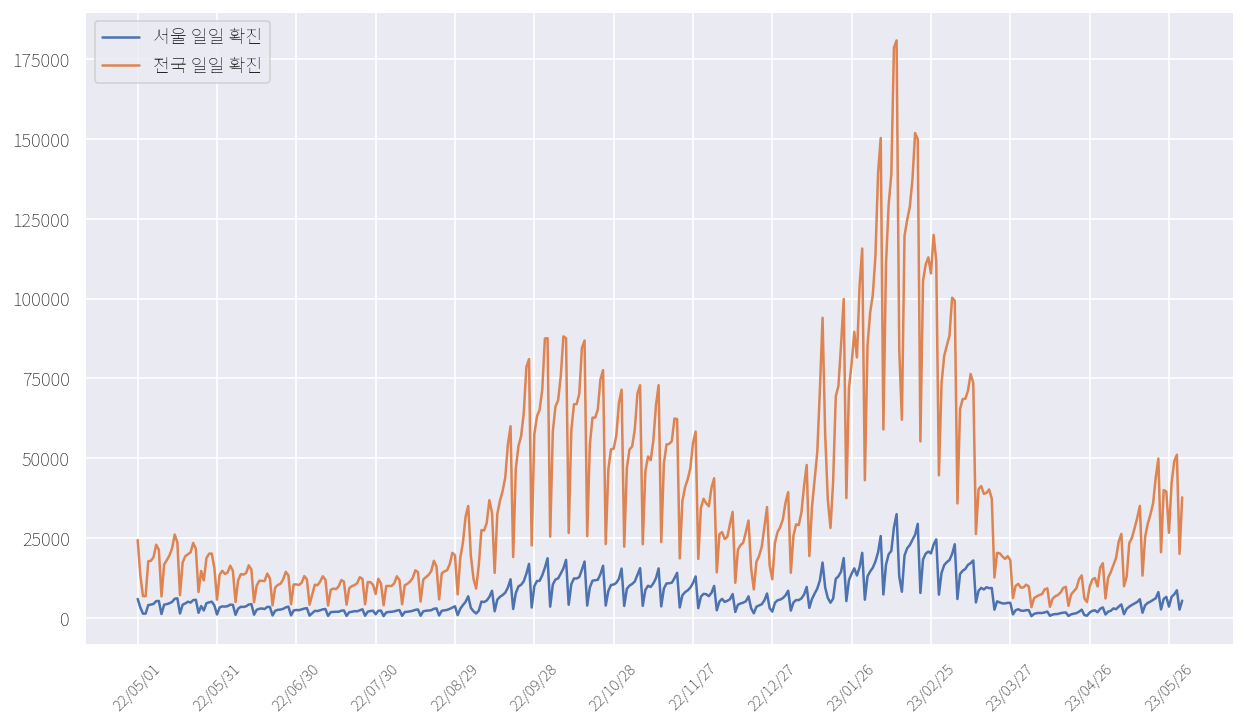

In [13]:
width_px = 1280
height_px =760
rows = 1
cols =1
figsize= (width_px /my_dpi, height_px /my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.lineplot(data=df['서울시 일일 확진'].values,label="서울 일일 확진")
sb.lineplot(data=df['전국 일일 확진'].values,label="전국 일일 확진")

ax.grid(True)
ax.set_xticks(x, xticks, rotation=45, fontsize = 9)
ax.legend(loc="upper left")


plt.tight_layout()
plt.savefig("myplot.png", dpi=my_dpi)
plt.show()
plt.close()